# Applying the official CycleGAN pre-trained models to our database
These can be accessed in https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

## Mount Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Set the device

In [2]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.device_count())

cuda:0
1


## Change current directory

In [3]:
import os
os.chdir("/content/drive/MyDrive/Code/checkpoints/pytorch-CycleGAN-and-pix2pix")

We can explore the folders in the current directory

In [4]:
print("Current Directory:")
!ls;

Current Directory:
checkpoints	docs		 models		requirements.txt  train.py
CycleGAN.ipynb	environment.yml  options	results		  util
data		imgs		 pix2pix.ipynb	scripts
datasets	LICENSE		 README.md	test.py


### Download pre-trained models

In [5]:
!bash ./scripts/download_cyclegan_model.sh monet2photo

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [monet2photo]
for details.

--2023-06-07 23:07:16--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/monet2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’

./checkpoints/monet 100%[===================>]  43.46M  14.2MB/s    in 3.4s    

2023-06-07 23:07:20 (13.0 MB/s) - ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’ saved [45575747/45575747]



## Unzip dataset

In [6]:
!unzip ./datasets/monet2photo/trainA.zip -d ./datasets/monet2photo/
!unzip ./datasets/monet2photo/trainB.zip -d ./datasets/monet2photo/
!unzip ./datasets/monet2photo/testA.zip -d ./datasets/monet2photo/
!unzip ./datasets/monet2photo/testB.zip -d ./datasets/monet2photo/

Archive:  ./datasets/monet2photo/trainA.zip
replace ./datasets/monet2photo/trainA/1f22663e72.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  ./datasets/monet2photo/trainB.zip
replace ./datasets/monet2photo/trainB/5a384bf8d9.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  ./datasets/monet2photo/testA.zip
replace ./datasets/monet2photo/testA/1f22663e72.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  ./datasets/monet2photo/testB.zip
replace ./datasets/monet2photo/testB/5a384bf8d9.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Training

In [31]:
!pip install dominate
!pip install wandb
!python train.py --dataroot ./datasets/monet2photo --name monet2photo --model cycle_gan --display_id -1 --gpu_ids 0 --batch_size 4 --n_epochs 1 --n_epochs_decay 0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/monet2photo        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_p

Once the models have trained, copy over the last checkpoint to a format that the testing model can automatically detect

Run the following line of code if you want to transform images from class A to class B

In [ ]:
!cp ./checkpoints/monet2photo_pretrained/latest_net_G_A.pth ./checkpoints/monet2photo_pretrained/latest_net_G.pth

cp: cannot stat './checkpoints/monet2photo_pretrained/latest_net_G_A.pth': No such file or directory
cp: cannot stat './checkpoints/style_monet_pretrained/latest_net_G_A.pth': No such file or directory


Conervsely, run the following line of code if you want to transform images from class B to class A

In [29]:
!cp ./checkpoints/monet2photo_pretrained/latest_net_G_B.pth ./checkpoints/monet2photo_pretrained/latest_net_G.pth

## Testing

In [30]:
!python test.py --dataroot ./datasets/monet2photo/testB --name monet2photo_pretrained --model test --no_dropout 

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/monet2photo/testB  	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

## Visualize

In [27]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_pretrained/test_latest/images/epoch001_real_B.png')
plt.imshow(img)

FileNotFoundError: ignored

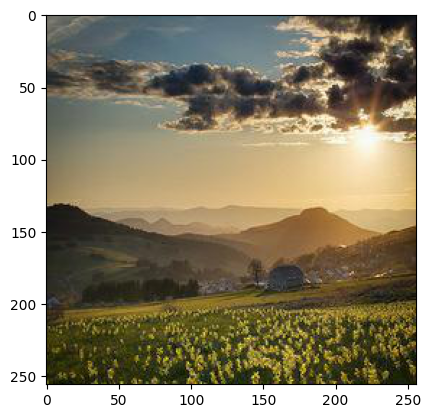

In [23]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/epoch001_fake_B.png')
plt.imshow(img)